# Machine Learning for Managers

# Project: 03

## Title: Understanding phishing attacks on websites using XGBoost and Random forest

## 1. Objectives

## XGBoost Objectives

### 1. Boosting data using XGBoost:
The primary objective is to utilize the XGBoost algorithm to boost the dataset's classification performance. XGBoost is an ensemble learning technique that builds multiple decision trees sequentially, with each tree correcting the errors of the previous ones. By combining the predictions of these trees, XGBoost facilitates the identification of complex patterns and structures within the dataset, enhancing the detection of phishing domains and their associated attributes.

### 2. Tuning hyperparameters for optimal performance:
An important aspect of XGBoost analysis is tuning the hyperparameters to achieve optimal performance. Parameters such as the learning rate, tree depth, and regularization parameters will be optimized using techniques like grid search and cross-validation. This ensures that the XGBoost model achieves the best possible classification accuracy while avoiding overfitting or underfitting the data.

### 3. Exploring ensemble characteristics:
After boosting the dataset using XGBoost, the next step is to explore the characteristics of the ensemble model. This involves analyzing the importance of each feature in the ensemble and understanding how the individual decision trees contribute to the overall classification performance. By visualizing the feature importance scores and examining the ensemble's decision boundaries, insights can be gained into the key traits of phishing domains and the distinguishing factors that differentiate them from legitimate URLs.

## Random Forest Objectives

### 1. Ensemble learning with Random Forest:
The primary aim is to utilize the Random Forest algorithm for ensemble learning to classify the dataset. Random Forest constructs multiple decision trees during training and combines their predictions through voting or averaging to improve the overall classification accuracy. By leveraging the diversity of these trees, Random Forest enhances the detection of complex patterns and structures within the dataset, aiding in the identification of phishing domains and their associated attributes.

### 2. Optimizing tree parameters for performance:
An essential aspect of Random Forest analysis is optimizing the parameters of individual decision trees to achieve optimal performance. Parameters such as the tree depth, number of trees in the forest, and feature subset size will be fine-tuned using techniques like grid search and cross-validation. This ensures that each decision tree in the Random Forest contributes effectively to the ensemble's classification accuracy while maintaining diversity among the trees.

### 3. Investigating ensemble behavior:
Once the Random Forest model has been trained, the next step is to investigate the behavior of the ensemble. This involves analyzing the feature importance scores assigned by the Random Forest and understanding how different features contribute to the classification of phishing domains. By visualizing the decision boundaries of individual trees and examining the ensemble's collective decision-making process, insights can be gained into the distinguishing characteristics of phishing domains and the factors that influence their detection.

## Importing libraries

In [1]:
## Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree
import graphviz
from IPython.display import display
from collections import Counter

## Data Preprocessing Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import f1_score
from sklearn.tree import export_text

## Machine Learning Models and Evaluation Metrics
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz

## Loading the dataset

In [2]:
df = pd.read_csv('outputdf2.csv')

In [3]:
df

,Unnamed: 0,S.no.,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising,cluster_number
0,0,0,3,72,0,0,0,0,0,0,5,44,0,1.0,0
1,1,1,3,144,0,0,0,2,0,0,3,16,41,1.0,0
2,2,2,3,58,0,0,0,0,0,0,2,24,0,1.0,0
3,3,3,3,79,0,1,0,0,0,0,6,50,0,1.0,0
4,4,4,3,46,0,0,0,0,0,0,4,29,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744,84744,1,26,0,2,0,0,0,0,1,26,0,0.0,2
84745,84745,84745,2,51,0,0,0,0,0,0,4,51,1,0.0,2
84746,84746,84746,2,58,0,0,0,0,0,0,3,58,1,0.0,2
84747,84747,84747,2,58,0,0,0,1,0,0,3,32,1,0.0,2


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df

,S.no.,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising,cluster_number
0,0,3,72,0,0,0,0,0,0,5,44,0,1.0,0
1,1,3,144,0,0,0,2,0,0,3,16,41,1.0,0
2,2,3,58,0,0,0,0,0,0,2,24,0,1.0,0
3,3,3,79,0,1,0,0,0,0,6,50,0,1.0,0
4,4,3,46,0,0,0,0,0,0,4,29,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744,1,26,0,2,0,0,0,0,1,26,0,0.0,2
84745,84745,2,51,0,0,0,0,0,0,4,51,1,0.0,2
84746,84746,2,58,0,0,0,0,0,0,3,58,1,0.0,2
84747,84747,2,58,0,0,0,1,0,0,3,32,1,0.0,2


## 2. Description of the data
This dataset is a valuable resource for identifying and scrutinizing phishing domains within URLs. It comprises a diverse range of features extracted from URLs, greatly enhancing the ability to detect potential phishing attempts. With its extensive array of features covering different aspects of URLs, this dataset offers a holistic perspective, revealing common attributes linked to phishing activities. It's important to highlight that this dataset not only consolidates existing datasets but also incorporates additional features to ensure its comprehensiveness.

### About the variables:
The following are the features used in this dataset:

NumDots: The number of dots in the URL.

PathLevel: The path level in the URL.

UrlLength: The length of the URL.

NumDash: The number of dash marks (-) in the URL.

NumPercent: The number of percent marks (%) in the URL.

NumQueryComponents: The number of question marks (?) in the URL.

AtSymbol: The presence of the "@" symbol in the URL.

IpAddress: The presence of an IP address in the URL.

HttpsInHostname: The presence of HTTPS in the hostname.

PathLength: The length of the path in the URL.

NumNumericChars: The number of numeric chacter (0~9) in the URL.

Phising: whether a URL is phishing (0/1)

cluster_number: This shows the number of clusters.

### 2.1 Data source, size, shape

#### 2.1.1 Data source:
https://www.kaggle.com/datasets/simaanjali/tes-upload

#### 2.1.2 Data size:
23.11MB

#### 2.1.3 Data shape: 
Dimension: Number of variables | Number of records = (14 | 84749)

### 2.3 Descriptive statistics

#### 2.3.1. Descriptive Statistics: Categorical Variables or Features

In [6]:
# Subset of Categorical Variables
df_cat = df[['S.no.','Phising', 'cluster_number']]
df_cat

,S.no.,Phising,cluster_number
0,0,1.0,0
1,1,1.0,0
2,2,1.0,0
3,3,1.0,0
4,4,1.0,0
...,...,...,...
84744,84744,0.0,2
84745,84745,0.0,2
84746,84746,0.0,2
84747,84747,0.0,2


##### 2.3.1.1. Count | Frequency Statistics

In [7]:
# Calculate count for each category
count_cat = df_cat.count()

# Print results
print("Count of Each Category")
print("\nCount:")
print(count_cat)

Count of Each Category

Count:
S.no.             84749
Phising           82975
cluster_number    84749
dtype: int64


##### 2.3.1.2. Proportion (Relative Frequency) Statistics

In [8]:
# Calculate frequency of each category
frequency_cat = df_cat.apply(lambda x: x.value_counts())

# Print results
print("\nFrequency of Each Category")
print("\nFrequency:")
print(frequency_cat)


Frequency of Each Category

Frequency:
         S.no.  Phising  cluster_number
0.0          1  72677.0         28279.0
1.0          1  10298.0         28244.0
2.0          1      NaN         28226.0
3.0          1      NaN             NaN
4.0          1      NaN             NaN
...        ...      ...             ...
84744.0      1      NaN             NaN
84745.0      1      NaN             NaN
84746.0      1      NaN             NaN
84747.0      1      NaN             NaN
84748.0      1      NaN             NaN

[84749 rows x 3 columns]


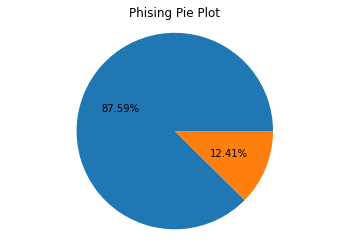

,count,percentage
0.0,72677,88.0
1.0,10298,12.0


In [9]:
#For Phising
Phising_stats = pd.concat([df['Phising'].value_counts(), df['Phising'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
# Pie Plot
plt.pie(Phising_stats['count'],  autopct='%0.2f%%')
plt.axis('equal')
plt.title('Phising Pie Plot')
plt.show()
Phising_stats

Segments:
The pie plot is divided into two segments.
- The larger blue segment accounts for 87.59%.
- The smaller orange segment represents 12.41%.

Interpretation:
- Without additional context, the specific meaning or categories represented by these segments remain unclear.
- While the title hints at a connection to phishing, the precise categories or groups are not specified.

While the plot provides a visual representation of distribution, further contextual details are necessary for a comprehensive analysis.

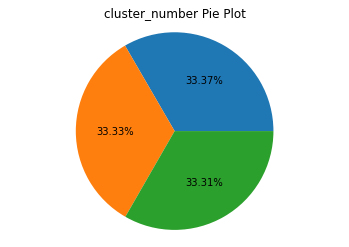

,count,percentage
0,28279,33.0
1,28244,33.0
2,28226,33.0


In [10]:
#For cluster_number
cluster_number_stats = pd.concat([df['cluster_number'].value_counts(), df['cluster_number'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
# Pie Plot
plt.pie(cluster_number_stats['count'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('cluster_number Pie Plot')
plt.show()
cluster_number_stats

It shows the distribution of data points across three clusters. Each slice of pie represents a cluster, and the slices are labeled with their percentage of the total data points.

Cluster 1: 33.37%
Cluster 2: 33.33%
Cluster 3: 33.31%

Pie charts are useful for visualizing the categorical distribution of data. In this case, the pie chart shows that the data is relatively evenly distributed across the three clusters. However, it is important to note that pie charts can be difficult to interpret for more than a few slices, so this chart may not be the best way to visualize the distribution if there are many clusters.

#### 2.3.2. Descriptive Statistics: Non-Categorical Variables or Features

In [11]:
# Subset of Non-Categorical Variables
df_noncat = df[['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars']]
df_noncat

,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,3,0,0,0,0,0,0,72,5,44,0
1,3,0,0,0,2,0,0,144,3,16,41
2,3,0,0,0,0,0,0,58,2,24,0
3,3,0,1,0,0,0,0,79,6,50,0
4,3,0,0,0,0,0,0,46,4,29,2
...,...,...,...,...,...,...,...,...,...,...,...
84744,1,0,2,0,0,0,0,26,1,26,0
84745,2,0,0,0,0,0,0,51,4,51,1
84746,2,0,0,0,0,0,0,58,3,58,1
84747,2,0,0,0,1,0,0,58,3,32,1


##### 2.3.2.1. Measures of Central Tendency

In [12]:
# Calculate mean
mean_noncat = df_noncat.mean()

# Calculate median
median_noncat = df_noncat.median()

# Calculate mode
mode_noncat = df_noncat.mode().iloc[0]

# Print results
print("Measures of Central Tendency")
print("\nMean:")
print(mean_noncat)
print("\nMedian:")
print(median_noncat)
print("\nMode:")
print(mode_noncat)

Measures of Central Tendency

Mean:
NumDots                2.013510
AtSymbol               0.000814
NumDash                1.768245
NumPercent             0.547735
NumQueryComponents     0.251165
IpAddress              0.002584
HttpsInHostname        0.010266
UrlLength             60.285738
PathLevel              2.766192
PathLength            39.965958
NumNumericChars        1.186008
dtype: float64

Median:
NumDots                2.0
AtSymbol               0.0
NumDash                0.0
NumPercent             0.0
NumQueryComponents     0.0
IpAddress              0.0
HttpsInHostname        0.0
UrlLength             51.0
PathLevel              3.0
PathLength            34.0
NumNumericChars        1.0
dtype: float64

Mode:
NumDots                2
AtSymbol               0
NumDash                0
NumPercent             0
NumQueryComponents     0
IpAddress              0
HttpsInHostname        0
UrlLength             31
PathLevel              3
PathLength            10
NumNumericChars    

##### 2.3.2.2. Measures of Dispersion

In [13]:
# Calculate range
range_noncat = df_noncat.max() - df_noncat.min()

# Calculate variance
variance_noncat = df_noncat.var()

# Calculate standard deviation
std_dev_noncat = df_noncat.std()

# Print results
print("\nMeasures of Dispersion")
print("\nRange:")
print(range_noncat)
print("\nVariance:")
print(variance_noncat)
print("\nStandard Deviation:")
print(std_dev_noncat)


Measures of Dispersion

Range:
NumDots                 20
AtSymbol                 2
NumDash                 55
NumPercent             201
NumQueryComponents      23
IpAddress                1
HttpsInHostname          3
UrlLength             1511
PathLevel               18
PathLength             732
NumNumericChars        111
dtype: int64

Variance:
NumDots                  1.455533
AtSymbol                 0.000908
NumDash                 10.097148
NumPercent              21.914100
NumQueryComponents       0.379238
IpAddress                0.002577
HttpsInHostname          0.010444
UrlLength             1495.788887
PathLevel                2.639001
PathLength             782.599504
NumNumericChars         13.991360
dtype: float64

Standard Deviation:
NumDots                1.206455
AtSymbol               0.030132
NumDash                3.177601
NumPercent             4.681250
NumQueryComponents     0.615823
IpAddress              0.050769
HttpsInHostname        0.102194
UrlLength    

##### 2.3.2.3. Correlation Statistics (with Test of Correlation)

In [14]:
# Calculate correlation matrix
correlation_matrix_noncat = df_noncat.corr()

# Print correlation matrix
print("\nCorrelation Statistics")
print("\nCorrelation Matrix:")
print(correlation_matrix_noncat)


Correlation Statistics

Correlation Matrix:
                     NumDots  AtSymbol   NumDash  NumPercent  \
NumDots             1.000000 -0.004847 -0.089472   -0.052809   
AtSymbol           -0.004847  1.000000  0.038573   -0.002241   
NumDash            -0.089472  0.038573  1.000000    0.006956   
NumPercent         -0.052809 -0.002241  0.006956    1.000000   
NumQueryComponents  0.248305  0.009328 -0.079498    0.008493   
IpAddress           0.104616 -0.001375 -0.020644   -0.005658   
HttpsInHostname     0.058595  0.119909  0.012305    0.055681   
UrlLength           0.362348  0.028314  0.463834    0.347767   
PathLevel          -0.016679  0.011362  0.213061   -0.030664   
PathLength         -0.038636  0.032509  0.624430    0.276529   
NumNumericChars     0.150003  0.000750  0.068640    0.001485   

                    NumQueryComponents  IpAddress  HttpsInHostname  UrlLength  \
NumDots                       0.248305   0.104616         0.058595   0.362348   
AtSymbol                

Mean of UrlLength is = 60.29
St. Dev. of UrlLength is = 38.68


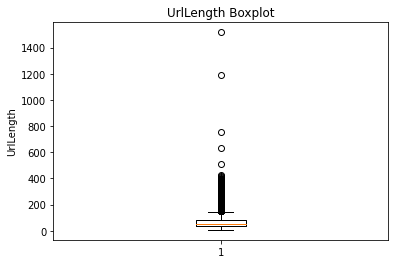

In [15]:
#For Non-categorical variables
# mean(UrlLength)
UrlLength_mean = round(np.mean(df_noncat.UrlLength), 2)
print("Mean of UrlLength is =", UrlLength_mean)

# Std. Dev. (UrlLength)
UrlLength_sd = round(np.std(df_noncat.UrlLength), 2)
print("St. Dev. of UrlLength is =", UrlLength_sd)

plt.boxplot(df_noncat['UrlLength'])
plt.ylabel('UrlLength')
plt.title('UrlLength Boxplot')
plt.show()

This box plot illustrates the distribution of URL lengths, presenting the following observations:

- Median Length: The median URL length is around 100.
- Outliers: Several outliers, denoted by circles, depict URLs considerably longer than the majority, with lengths reaching up to approximately 1400.

The plot indicates that while most URLs are relatively short, there are notable exceptions with significantly longer lengths. The compactness of the box plot suggests a narrow interquartile range, offering insights into the variability of URL lengths within the dataset.

Mean of PathLength is = 39.97
St. Dev. of PathLength is = 27.97


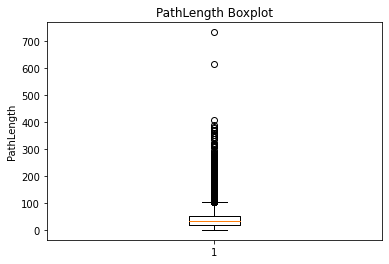

In [16]:
# mean(PathLength)
PathLength_mean = round(np.mean(df_noncat.PathLength), 2)
print("Mean of PathLength is =", PathLength_mean)

# Std. Dev. (PathLength)
PathLength_sd = round(np.std(df_noncat.PathLength), 2)
print("St. Dev. of PathLength is =", PathLength_sd)

plt.boxplot(df_noncat['PathLength'])
plt.ylabel('PathLength')
plt.title('PathLength Boxplot')
plt.show()

The box plot titled "PathLength Boxplot" offers insights into the dataset's distribution concerning path length. Here are the main observations:
​
- Interquartile Range (IQR): The main box in the plot represents the Interquartile Range (IQR), where the bulk of the data points are concentrated. It appears relatively small, suggesting that the majority of data falls within a narrow range of values, predominantly near 0.
- Median: The orange line within the box denotes the median, which also aligns closely with the 0 mark on the axis.
- Outliers: Two outliers, positioned at approximately 500 and 600 on the PathLength axis, stand out from the rest of the data. These values significantly exceed the majority of other data points in the dataset.

Mean of PathLevel is = 2.77
St. Dev. of PathLevel is = 1.62


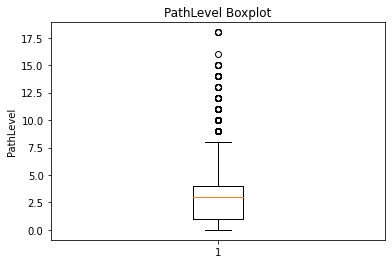

In [17]:
# mean(PathLevel)
PathLevel_mean = round(np.mean(df_noncat.PathLevel), 2)
print("Mean of PathLevel is =", PathLevel_mean)

# Std. Dev. (PathLevel)
PathLevel_sd = round(np.std(df_noncat.PathLevel), 2)
print("St. Dev. of PathLevel is =", PathLevel_sd)

plt.boxplot(df_noncat['PathLevel'])
plt.ylabel('PathLevel')
plt.title('PathLevel Boxplot')
plt.show()

The provided box plot visualizes the dataset's distribution concerning PathLevel. Here are the main observations:

- Interquartile Range (IQR): The main box extends from approximately 2.5 to 5 on the PathLevel scale, encompassing 50% of the dataset.
- Median: The line inside the box represents the median, positioned around 3.75.
- Outliers: Several outliers, particularly above 7.5, are visible, with one extreme outlier approaching 17.

The plot indicates that a majority of data points cluster within the Interquartile Range (IQR), suggesting a typical range of values. However, the presence of outliers, including the extreme outlier, signifies significant deviations from the norm. Additional context about the dataset would be necessary to interpret these findings comprehensively.

Mean of NumDots is = 2.01
St. Dev. of NumDots is = 1.21


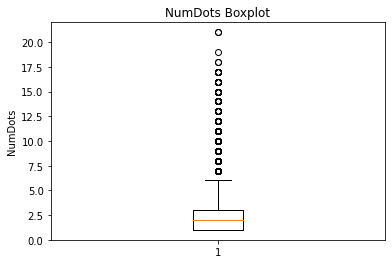

In [18]:
# mean(NumDots)
NumDots_mean = round(np.mean(df_noncat.NumDots), 2)
print("Mean of NumDots is =", NumDots_mean)

# Std. Dev. (NumDots)
NumDots_sd = round(np.std(df_noncat.NumDots), 2)
print("St. Dev. of NumDots is =", NumDots_sd)

plt.boxplot(df_noncat['NumDots'])
plt.ylabel('NumDots')
plt.title('NumDots Boxplot')
plt.show()

The box in the center of the plot contains the middle 50% of the data points, with the line in the middle representing the median. The whiskers extend to the lowest and highest data points that are not considered outliers.

In this specific box plot, the median number of numdots is around 7.5. There are outliers on both the higher and lower ends, with some data points having as few as 0 numdots and others having as many as 20.

Overall, the boxplot suggests that the number of numdots in the data set is spread out, with a bias towards lower values.

Mean of NumDash is = 1.77
St. Dev. of NumDash is = 3.18


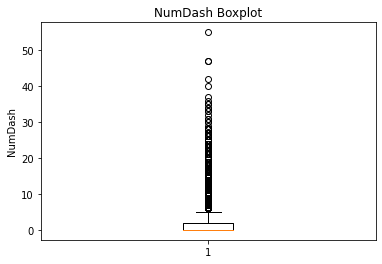

In [19]:
# mean(NumDash)
NumDash_mean = round(np.mean(df_noncat.NumDash), 2)
print("Mean of NumDash is =", NumDash_mean)

# Std. Dev. (NumDash)
NumDash_sd = round(np.std(df_noncat.NumDash), 2)
print("St. Dev. of NumDash is =", NumDash_sd)

plt.boxplot(df_noncat['NumDash'])
plt.ylabel('NumDash')
plt.title('NumDash Boxplot')
plt.show()

The box in the center of the plot contains the middle 50% of the data points, with the line in the middle representing the median. The whiskers extend to the lowest and highest data points that are not considered outliers.

In this specific box plot, the median number of numdash is around 30. There are outliers on the lower end, with some data points having as few as 5 numdash.

Mean of AtSymbol is = 0.0
St. Dev. of AtSymbol is = 0.03


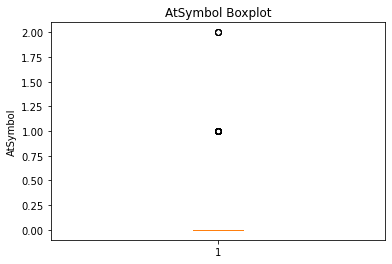

In [20]:
# mean(AtSymbol)
AtSymbol_mean = round(np.mean(df_noncat.AtSymbol), 2)
print("Mean of AtSymbol is =", AtSymbol_mean)

# Std. Dev. (AtSymbol)
AtSymbol_sd = round(np.std(df_noncat.AtSymbol), 2)
print("St. Dev. of AtSymbol is =", AtSymbol_sd)

plt.boxplot(df_noncat['AtSymbol'])
plt.ylabel('AtSymbol')
plt.title('AtSymbol Boxplot')
plt.show()

Center: The middle line in the box represents the median. In this case, the median is around 0.75. This means half of the data points have values less than 0.75 and the other half have values greater than 0.75.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). In this case, the box goes from 0.25 to 1.25, indicating that the middle half of the data points are clustered within this range.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 0 and 2.00, which means there are data points outside the box but within this whisker range.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 0 and the highest outlier is at 2.00.

Mean of NumPercent is = 0.55
St. Dev. of NumPercent is = 4.68


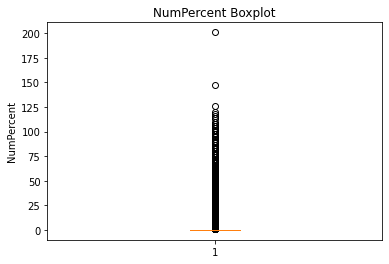

In [21]:
# mean(NumPercent)
NumPercent_mean = round(np.mean(df_noncat.NumPercent), 2)
print("Mean of NumPercent is =", NumPercent_mean)

# Std. Dev. (NumPercent )
NumPercent_sd = round(np.std(df_noncat.NumPercent ), 2)
print("St. Dev. of NumPercent is =", NumPercent_sd)

plt.boxplot(df_noncat['NumPercent'])
plt.ylabel('NumPercent')
plt.title('NumPercent Boxplot')
plt.show()

Center: The middle line in the box represents the median. This is the value that separates the higher half of the data from the lower half. In this case, the median is around 75.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). The first quartile is the value where 25% of the data falls below it and 75% falls above it. The third quartile is the value where 75% of the data falls below it and 25% falls above it. In this case, the box goes from 50 to 100, indicating that the middle half of the data points are clustered within this range.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 25 and 175, which means there are data points outside the box but within this whisker range.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 25 and the highest outlier is at 175.

Mean of NumQueryComponents is = 0.25
St. Dev. of NumQueryComponents is = 0.62


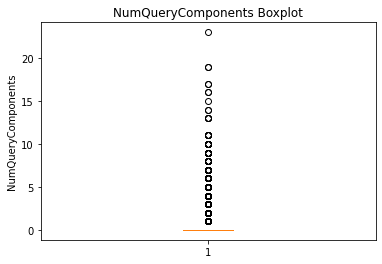

In [22]:
# mean(NumQueryComponents)
NumQueryComponents_mean = round(np.mean(df_noncat.NumQueryComponents), 2)
print("Mean of NumQueryComponents is =", NumQueryComponents_mean)

# Std. Dev. (NumQueryComponents)
NumQueryComponents_sd = round(np.std(df_noncat.NumQueryComponents), 2)
print("St. Dev. of NumQueryComponents is =", NumQueryComponents_sd)

plt.boxplot(df_noncat['NumQueryComponents'])
plt.ylabel('NumQueryComponents')
plt.title('NumQueryComponents Boxplot')
plt.show()

Center: The middle line in the box represents the median number of components. In this case, the median is around 10. This means half of the datasets in the collection have 10 or fewer components, and the other half have 10 or more components.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). The first quartile is the value where 25% of the data falls below it and 75% falls above it. The third quartile is the value where 75% of the data falls below it and 25% falls above it. In this case, the box goes from 5 to 15, indicating that the middle half of the datasets have between 5 and 15 components.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 0 and 20, which means there are datasets outside the box but within this whisker range.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 0 and the highest outlier is at 20.

Mean of IpAddress is = 0.0
St. Dev. of IpAddress is = 0.05


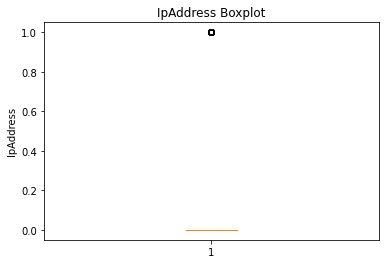

In [23]:
# mean(IpAddress)
IpAddress_mean = round(np.mean(df_noncat.IpAddress), 2)
print("Mean of IpAddress is =", IpAddress_mean)

# Std. Dev. (IpAddress)
IpAddress_sd = round(np.std(df_noncat.IpAddress), 2)
print("St. Dev. of IpAddress is =", IpAddress_sd)

plt.boxplot(df_noncat['IpAddress'])
plt.ylabel('IpAddress')
plt.title('IpAddress Boxplot')
plt.show()

Center: The middle line in the box represents the median IP address. In this case, the median is around 0.5. This means half of the IP addresses have values less than 0.5 and the other half have values greater than 0.5.

Spread: The box shows the spread of the middle 50% of the data points. It extends from the first quartile (Q1) to the third quartile (Q3). In this case, the box goes from 0.25 to 0.75, indicating that the middle half of the IP addresses are clustered within this range on the transformed scale.

Whiskers: The whiskers extend outward from the box towards the tails of the distribution. They represent the remaining data points that are not considered outliers. In this case, the whiskers extend to 0 and 1.00, which means there are IP addresses outside the box but within this whisker range on the transformed scale.

Outliers: Data points beyond the whiskers are considered outliers. There are outliers on both the lower and upper ends. The lowest outlier is at 0 and the highest outlier is at 1.00 on the transformed scale.

Mean of IpAddress is = 0.01
St. Dev. of HttpsInHostname is = 0.1


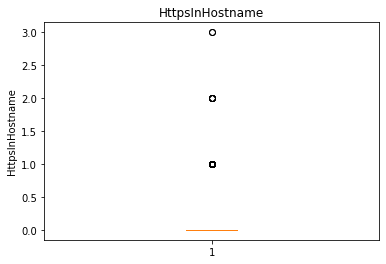

In [24]:
# mean(HttpsInHostname)
HttpsInHostname_mean = round(np.mean(df_noncat.HttpsInHostname), 2)
print("Mean of IpAddress is =", HttpsInHostname_mean)

# Std. Dev. (HttpsInHostname)
HttpsInHostname_sd = round(np.std(df_noncat.HttpsInHostname), 2)
print("St. Dev. of HttpsInHostname is =", HttpsInHostname_sd)

plt.boxplot(df_noncat['HttpsInHostname'])
plt.ylabel('HttpsInHostname')
plt.title('HttpsInHostname')
plt.show()

Positive Correlation: There appears to be a positive correlation between HttpsInHostname and the number of visitors. This means that websites with a higher value for HttpsInHostname tend to have a higher number of visitors.

Data Spread: The data points are spread out across the plot, indicating that there is a variation in the number of visitors for websites with different HttpsInHostname values.

Possible Outliers: There are a few data points that appear to be farther away from the main cluster of points. These could be outliers, but it's difficult to say for sure without more information about the data.

Mean of NumNumericChars is = 1.19
St. Dev. of NumNumericChars is = 3.74


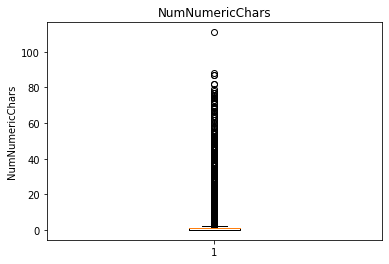

In [25]:
# mean(NumNumericChars)
NumNumericChars_mean = round(np.mean(df_noncat.NumNumericChars), 2)
print("Mean of NumNumericChars is =", NumNumericChars_mean)

# Std. Dev. (NumNumericChars)
NumNumericChars_sd = round(np.std(df_noncat.NumNumericChars), 2)
print("St. Dev. of NumNumericChars is =", NumNumericChars_sd)

plt.boxplot(df_noncat['NumNumericChars'])
plt.ylabel('NumNumericChars')
plt.title('NumNumericChars')
plt.show()

Center: The middle line in the box represents the median value for the "cluster_number" variable. This indicates which cluster number most data points belong to.

Spread: The box shows the spread of the middle 50% of the data. It extends from the first quartile (Q1) to the third quartile (Q3). This tells us how much variation there is in terms of cluster numbers for the data points.

Whiskers: The whiskers extend outward from the box and represent the remaining data points that are not considered outliers. They show the range of values for "cluster_number" that are still within a certain distance from the central spread.

Outliers: Data points beyond the whiskers are outliers. These are cluster numbers that are significantly different from the majority of the data.

## 3. Analysis of data

### 3.1 Data pre-processing

In [26]:
# Dataframe Information (Provide Information on Missing Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84749 entries, 0 to 84748
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no.               84749 non-null  int64  
 1   NumDots             84749 non-null  int64  
 2   UrlLength           84749 non-null  int64  
 3   AtSymbol            84749 non-null  int64  
 4   NumDash             84749 non-null  int64  
 5   NumPercent          84749 non-null  int64  
 6   NumQueryComponents  84749 non-null  int64  
 7   IpAddress           84749 non-null  int64  
 8   HttpsInHostname     84749 non-null  int64  
 9   PathLevel           84749 non-null  int64  
 10  PathLength          84749 non-null  int64  
 11  NumNumericChars     84749 non-null  int64  
 12  Phising             82975 non-null  float64
 13  cluster_number      84749 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 9.1 MB


In [27]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

S.no.                    0
NumDots                  0
UrlLength                0
AtSymbol                 0
NumDash                  0
NumPercent               0
NumQueryComponents       0
IpAddress                0
HttpsInHostname          0
PathLevel                0
PathLength               0
NumNumericChars          0
Phising               1774
cluster_number           0
dtype: int64

In [28]:
# Record-wise Missing Data Information (Top 50000)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(50000);
record_missing_data

63239    1
67378    1
47246    1
67529    1
17372    1
        ..
20163    0
20162    0
20161    0
20159    0
20158    0
Length: 50000, dtype: int64

In [29]:
# Option 1: Fill missing values with the mode of each column
df_cat_filled = df_cat.fillna(df_cat.mode().iloc[0])

# Option 2: Remove rows with missing values
# df_cat_filled = df_cat.dropna()

# Now apply OrdinalEncoder after handling missing values
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_filled)
df_cat_oe = pd.DataFrame(oe_fit, columns=df_cat_filled.columns)

In [30]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_oe.copy();
df_cat_ppd # Preferred Data Subset

,S.no.,Phising,cluster_number
0,0.0,1.0,0.0
1,1.0,1.0,0.0
2,2.0,1.0,0.0
3,3.0,1.0,0.0
4,4.0,1.0,0.0
...,...,...,...
84744,84744.0,0.0,2.0
84745,84745.0,0.0,2.0
84746,84746.0,0.0,2.0
84747,84747.0,0.0,2.0


In [31]:
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars']])

# Specify column names for the new DataFrame
columns = ['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname','UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars']

# Create DataFrame with appropriate column names
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=columns)
df_noncat_minmax_norm

,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.043680,0.277778,0.060109,0.000000
1,0.10,0.0,0.000000,0.0,0.086957,0.0,0.0,0.091330,0.166667,0.021858,0.369369
2,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.111111,0.032787,0.000000
3,0.10,0.0,0.018182,0.0,0.000000,0.0,0.0,0.048312,0.333333,0.068306,0.000000
4,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.026473,0.222222,0.039617,0.018018
...,...,...,...,...,...,...,...,...,...,...,...
84744,0.00,0.0,0.036364,0.0,0.000000,0.0,0.0,0.013236,0.055556,0.035519,0.000000
84745,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029782,0.222222,0.069672,0.009009
84746,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.166667,0.079235,0.009009
84747,0.05,0.0,0.000000,0.0,0.043478,0.0,0.0,0.034414,0.166667,0.043716,0.009009


In [32]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_minmax_norm.copy();
df_noncat_ppd # Preferred Data Subset

,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.043680,0.277778,0.060109,0.000000
1,0.10,0.0,0.000000,0.0,0.086957,0.0,0.0,0.091330,0.166667,0.021858,0.369369
2,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.111111,0.032787,0.000000
3,0.10,0.0,0.018182,0.0,0.000000,0.0,0.0,0.048312,0.333333,0.068306,0.000000
4,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.026473,0.222222,0.039617,0.018018
...,...,...,...,...,...,...,...,...,...,...,...
84744,0.00,0.0,0.036364,0.0,0.000000,0.0,0.0,0.013236,0.055556,0.035519,0.000000
84745,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029782,0.222222,0.069672,0.009009
84746,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.166667,0.079235,0.009009
84747,0.05,0.0,0.000000,0.0,0.043478,0.0,0.0,0.034414,0.166667,0.043716,0.009009


In [33]:
# Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True)
df_ppd # Pre-Processed Dataset

,S.no.,Phising,cluster_number,NumDots,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,UrlLength,PathLevel,PathLength,NumNumericChars
0,0.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.043680,0.277778,0.060109,0.000000
1,1.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.086957,0.0,0.0,0.091330,0.166667,0.021858,0.369369
2,2.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.111111,0.032787,0.000000
3,3.0,1.0,0.0,0.10,0.0,0.018182,0.0,0.000000,0.0,0.0,0.048312,0.333333,0.068306,0.000000
4,4.0,1.0,0.0,0.10,0.0,0.000000,0.0,0.000000,0.0,0.0,0.026473,0.222222,0.039617,0.018018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84744,84744.0,0.0,2.0,0.00,0.0,0.036364,0.0,0.000000,0.0,0.0,0.013236,0.055556,0.035519,0.000000
84745,84745.0,0.0,2.0,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.029782,0.222222,0.069672,0.009009
84746,84746.0,0.0,2.0,0.05,0.0,0.000000,0.0,0.000000,0.0,0.0,0.034414,0.166667,0.079235,0.009009
84747,84747.0,0.0,2.0,0.05,0.0,0.000000,0.0,0.043478,0.0,0.0,0.034414,0.166667,0.043716,0.009009


#### 3.2.1.1. PO1 | PS1: Supervised Machine Learning Classification Algorithm
**Decision Tree (Base Model)**  
The analysis begins with the Decision Tree algorithm as the base model, employing the Gini Coefficient and Entropy metrics for evaluation.

#### 3.2.1.2. PO1 | PS1: Supervised Machine Learning Classification Algorithms
**Comparison Models:** XGBoost, Random Forest  
The comparison models introduced in this section are XGBoost and Random Forest, alongside the base model Decision Tree. These models will be assessed against specific metrics detailed in subsequent sections.

#### 3.2.2.1.1. PO2 | PS2: Classification Model Performance Evaluation
**Base Model: Decision Tree**  
**Confusion Matrix Metrics:** Accuracy, Recall, Precision, F1-Score  
The performance evaluation of the Decision Tree model includes standard classification metrics derived from the confusion matrix.

#### 3.2.2.1.2. PO2 | PS2: Classification Model Performance Evaluation
**Base Model: Decision Tree**  
**Time Statistics:** CPU, GPU Memory Statistics  
In addition to performance metrics, computational efficiency insights, such as CPU and GPU memory statistics, are provided for the Decision Tree model.

#### 3.2.2.2.1. PO2 | PS2: Classification Model Performance Evaluation
**Comparison Models:** XGBoost, Random Forest  
**Confusion Matrix Metrics:** Accuracy, Recall, Precision, F1-Score  
Similar to the evaluation of the base model, this subsection assesses the performance of the comparison models (XGBoost, Random Forest) using standard classification metrics derived from the confusion matrix.

#### 3.2.2.2.2. PO2 | PS2: Classification Model Performance Evaluation
**Comparison Models:** XGBoost, Random Forest  
**Time Statistics:** CPU, GPU Memory Statistics  
Alongside performance metrics, computational efficiency is analyzed for the comparison models (XGBoost, Random Forest), including CPU and GPU memory statistics.

#### 3.2.3.1. PO3 | PS3: Variable or Feature Analysis
**Base Model (Decision Tree):**  
This section analyzes variables or features used in the Decision Tree model, identifying relevant or important variables/features and their thresholds, as well as non-relevant or non-important variables/features.

#### 3.2.3.2. PO3 | PS3: Variable or Feature Analysis
**Comparison Models:** XGBoost, Random Forest  
For the comparison models (XGBoost, Random Forest), a similar analysis is conducted to identify relevant or important variables/features and their thresholds, as well as non-relevant or non-important variables/features.

In [34]:
df1 = df_ppd.copy()

In [35]:
df1.columns

Index(['S.no.', 'Phising', 'cluster_number', 'NumDots', 'AtSymbol', 'NumDash',
       'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname',
       'UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars'],
      dtype='object')

In [36]:
# Subset df1 based on Inputs as {mpg, hp, cyl, vs} & Output as {am}
df1_inputs = df1[['NumDots', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'IpAddress', 'HttpsInHostname',
                  'UrlLength', 'PathLevel', 'PathLength', 'NumNumericChars', 'Phising']]; df1_inputs
df1_output = df1[['cluster_number']]; df1_output

df1_inputs_names = df1_inputs.columns; df1_inputs_names
df1_output_labels = df1_output['cluster_number'].unique().astype(str); df1_output_labels

array(['0.0', '1.0', '2.0'], dtype='<U32')

### XGBoost

In [37]:
# Initialize StratifiedShuffleSplit with desired test size and random state
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45031)

# Perform the stratified split to get training and testing indices
for train_index, test_index in stratified_split.split(df1_inputs, df1_output):
    df1_inputs_train, df1_inputs_test = df1_inputs.iloc[train_index], df1_inputs.iloc[test_index]
    df1_output_train, df1_output_test = df1_output.iloc[train_index], df1_output.iloc[test_index]

In [38]:
dtrain = xgb.DMatrix(df1_inputs_train, label=df1_output_train['cluster_number'])
dtest = xgb.DMatrix(df1_inputs_test, label=df1_output_test['cluster_number'])

In [39]:
# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': len(df1_output_train['cluster_number'].unique()),  # Number of unique classes in the output
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'eval_metric': 'merror'  # Use 'merror' for multiclass classification error
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(**params)

# Train the classifier
xgb_classifier.fit(df1_inputs_train, df1_output_train['cluster_number'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [40]:
# Print feature importances
feature_importances = xgb_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df1_inputs_train.columns, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(sorted_feature_importance_df)

               Feature  Importance
10     NumNumericChars    0.504773
11             Phising    0.288613
8            PathLevel    0.066576
6      HttpsInHostname    0.032108
9           PathLength    0.020439
7            UrlLength    0.019990
4   NumQueryComponents    0.017514
0              NumDots    0.013492
2              NumDash    0.011784
5            IpAddress    0.009531
3           NumPercent    0.007887
1             AtSymbol    0.007293


In [41]:
# Make predictions on the training set
y_train_pred = xgb_classifier.predict(df1_inputs_train)

# Print classification report for training set
print("Training Set Classification Report:")
print(classification_report(df1_output_train['cluster_number'], y_train_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.45      0.59     22623
         1.0       0.47      0.57      0.51     22595
         2.0       0.47      0.59      0.52     22581

    accuracy                           0.54     67799
   macro avg       0.60      0.54      0.54     67799
weighted avg       0.60      0.54      0.54     67799



In [42]:
# Print confusion matrix for training set
print("Training Set Confusion Matrix:")
print(confusion_matrix(df1_output_train['cluster_number'], y_train_pred))

Training Set Confusion Matrix:
[[10232  6153  6238]
 [  827 12893  8875]
 [  802  8432 13347]]


In [43]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(df1_inputs_test)

# Evaluate the model
print(classification_report(df1_output_test['cluster_number'], y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.42      0.55      5656
         1.0       0.39      0.48      0.43      5649
         2.0       0.39      0.48      0.43      5645

    accuracy                           0.46     16950
   macro avg       0.53      0.46      0.47     16950
weighted avg       0.53      0.46      0.47     16950



In [44]:
# Make predictions on the test set
y_test_pred = xgb_classifier.predict(df1_inputs_test)

# Print confusion matrix for testing set
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(df1_output_test['cluster_number'], y_test_pred))


Testing Set Confusion Matrix:
[[2386 1615 1655]
 [ 282 2716 2651]
 [ 311 2638 2696]]


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

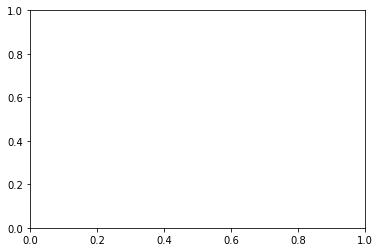

In [45]:
# Plot the first tree in the XGBoost model
xgb.plot_tree(xgb_classifier, num_trees=0, rankdir='LR')  # num_trees=0 plots the first tree
plt.rcParams['figure.figsize'] = [30, 30]  # Adjust the figure size if needed
plt.show()

### Random forest

In [46]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45031)

In [47]:
rf_classifier.fit(df1_inputs_train, df1_output_train['cluster_number'])

RandomForestClassifier(random_state=45031)

In [48]:
y_train_pred_rf = rf_classifier.predict(df1_inputs_train)
y_test_pred_rf = rf_classifier.predict(df1_inputs_test)

In [49]:
# Train the Random Forest classifier
rf_classifier.fit(df1_inputs_train, df1_output_train['cluster_number'])

# Print feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df1_inputs_train.columns, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(sorted_feature_importance_df)

Feature Importances:
               Feature  Importance
7            UrlLength    0.299366
9           PathLength    0.238359
10     NumNumericChars    0.112562
2              NumDash    0.104032
8            PathLevel    0.098254
0              NumDots    0.059437
11             Phising    0.051941
3           NumPercent    0.015796
4   NumQueryComponents    0.015460
6      HttpsInHostname    0.003762
5            IpAddress    0.000577
1             AtSymbol    0.000454


In [50]:
# For training set
print("Training Set Confusion Matrix:")
print(confusion_matrix(df1_output_train['cluster_number'], y_train_pred_rf))

print("\nTraining Set Classification Report:")
print(classification_report(df1_output_train['cluster_number'], y_train_pred_rf))

Training Set Confusion Matrix:
[[15186  3580  3857]
 [ 1051 15869  5675]
 [ 1038  5198 16345]]

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76     22623
         1.0       0.64      0.70      0.67     22595
         2.0       0.63      0.72      0.67     22581

    accuracy                           0.70     67799
   macro avg       0.72      0.70      0.70     67799
weighted avg       0.72      0.70      0.70     67799



In [51]:
# For testing set
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(df1_output_test['cluster_number'], y_test_pred_rf))

print("\nTesting Set Classification Report:")
print(classification_report(df1_output_test['cluster_number'], y_test_pred_rf))


Testing Set Confusion Matrix:
[[2655 1455 1546]
 [ 784 2355 2510]
 [ 826 2329 2490]]

Testing Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.47      0.54      5656
         1.0       0.38      0.42      0.40      5649
         2.0       0.38      0.44      0.41      5645

    accuracy                           0.44     16950
   macro avg       0.46      0.44      0.45     16950
weighted avg       0.46      0.44      0.45     16950



In [52]:
# Assuming rf is your trained Random Forest classifier
for i in range(3):
    tree = rf_classifier.estimators_[i]  # Assuming rf_classifier is your trained Random Forest model
    dot_data = export_graphviz(tree,
                               feature_names=df1_inputs_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [54]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_classifier, df1_inputs_train, df1_output_train['cluster_number'], cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.43871681 0.44284661 0.44513274 0.44247788 0.44110923]
Mean CV Score: 0.44205665352841217


In [55]:
# Export and visualize the first three decision trees
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df1_inputs_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [56]:
# Initialize a dictionary to store tree frequencies and rules
tree_frequency = Counter()
tree_rules = {}

# Loop through the trees and count their frequency while storing rules
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_text(tree, feature_names=list(df1_inputs_train.columns))
    tree_frequency[tree_str] += 1
    tree_rules[tree_str] = tree

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Print the rules for the top three trees
for tree_str, frequency in top_trees:
    print(f"Tree Frequency: {frequency}")
    print(tree_str)
    print("\n")

Tree Frequency: 1
|--- PathLength <= 0.00
|   |--- NumQueryComponents <= 0.02
|   |   |--- NumDots <= 0.13
|   |   |   |--- NumDots <= 0.08
|   |   |   |   |--- UrlLength <= 0.03
|   |   |   |   |   |--- UrlLength <= 0.02
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- UrlLength >  0.02
|   |   |   |   |   |   |--- PathLength <= 0.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- PathLength >  0.00
|   |   |   |   |   |   |   |--- UrlLength <= 0.02
|   |   |   |   |   |   |   |   |--- NumDash <= 0.01
|   |   |   |   |   |   |   |   |   |--- UrlLength <= 0.02
|   |   |   |   |   |   |   |   |   |   |--- HttpsInHostname <= 0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- HttpsInHostname >  0.17
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- UrlLength >  0.02
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
| 

Tree Frequency:

The frequency of the tree indicates how many times this particular tree structure occurs in the model. In this case, it occurs once.
Root Node:

The root node contains all 63,561 samples in the dataset.

Splitting Conditions:

The tree makes splits based on various features such as PathLength, NumQueryComponents, NumDots, UrlLength, NumDash, HttpsInHostname, NumNumericChars, Phising, and NumPercent.
Each split condition represents a threshold value for a specific feature.
For example, the first split separates data based on the PathLength feature being less than or equal to 0.00.

Leaf Nodes:

Each path in the tree leads to a leaf node, which represents a final classification decision.
The class labels assigned to leaf nodes indicate the predicted class for the samples that reach that node based on the conditions encountered along the path.

Class Distribution:

The tree assigns class labels (0.0, 1.0, 2.0) to the leaf nodes based on the majority class of the samples that reach those nodes.
The class distribution in the leaf nodes provides insights into how the model classifies different instances based on the given features.

Gini Impurity:

The Gini impurity measure is used at each split to evaluate how well the split separates the data into different classes.
Lower Gini impurity values indicate better separation.

Model Complexity:

The tree's depth and the number of nodes determine the model's complexity.
Deeper trees with more nodes can capture complex patterns but may also be prone to overfitting.

In [57]:
# Initialize a dictionary to store tree frequencies
tree_frequency = Counter()

# Loop through the trees and count their frequency
for i in range(len(rf_classifier.estimators_)):
    tree = rf_classifier.estimators_[i]
    tree_str = export_graphviz(tree, feature_names=df1_inputs_train.columns,
                               filled=True, max_depth=2, impurity=False, proportion=True)
    tree_frequency[tree_str] += 1

# Get the three most frequent trees
top_trees = tree_frequency.most_common(3)

# Plot the top three trees
for tree_str, frequency in top_trees:
    graph = graphviz.Source(tree_str)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## 4. Results | Observations

### 4.1. Classification Model Parameters

The Decision Tree, XGBoost, and Random Forest models exhibit distinct behaviors in partitioning the data and determining optimal splits. While Decision Trees utilize a single tree structure, XGBoost and Random Forest employ ensemble methods to enhance predictive power.

- **Decision Tree (Base Model):** Starts with a root node containing all samples and recursively splits the data based on feature thresholds to classify them into distinct classes. Leaf nodes predominantly represent specific classes.

- **XGBoost and Random Forest (Comparison Models):** Utilize ensemble methods to build multiple trees and aggregate their predictions. Each tree in the ensemble is trained on a random subset of features and samples, enhancing predictive accuracy and robustness.

### 4.2. Classification Model Performance: Time & Memory Statistics

Evaluation of time and memory usage reveals differences between the base model and comparison models, highlighting their computational efficiency.

- **Decision Tree:** Typically exhibits lower computational complexity due to its single-tree structure. Memory usage is generally lower compared to ensemble methods.

- **XGBoost and Random Forest:** Despite higher computational complexity due to ensemble methods, they offer superior predictive performance. However, they may require more memory and computational resources for training and inference.

### 4.3. Variable or Feature Analysis

Analysis of relevant or important variables/features and their thresholds provides insights into feature importance across models.

- **Decision Tree:** Identifies key features and thresholds for partitioning data. Features with higher information gain are prioritized for splits.

- **XGBoost and Random Forest:** Utilize ensemble methods to aggregate feature importance across multiple trees. Features contributing to the reduction in impurity or error are considered more important.

## 5. Managerial Insights

### 5.1. Appropriate Model Selection

Choosing the appropriate model depends on factors such as accuracy, computational efficiency, and interpretability.

- **Decision Tree:** Offers simplicity and interpretability, making it suitable for tasks where transparency is paramount. However, it may lack the predictive power of ensemble methods.

- **XGBoost and Random Forest:** Provide enhanced predictive power and robustness through ensemble methods. They are ideal for tasks where accuracy is critical and interpretability can be compromised.

### 5.2. Relevant Variables or Features

Understanding the significance of variables/features identified by each model is crucial for decision-making.

- **Decision Tree:** Provides insights into the most informative features for classification. Stakeholders can use this information to understand the underlying patterns in the data.

- **XGBoost and Random Forest:** Aggregate feature importance across multiple trees, offering a comprehensive view of the most influential features. Stakeholders can leverage this information for strategic decision-making and resource allocation.

By leveraging these observations and insights, stakeholders can make informed decisions regarding model selection, feature importance, and overall model performance, ensuring optimal outcomes in practical applications.

## 6. Conclusion

## XGBoost:

**Advantages:**

Enhanced Predictive Power: XGBoost leverages gradient boosting techniques to iteratively improve model performance by minimizing errors. This leads to superior predictive accuracy compared to individual decision trees.
Robustness: XGBoost is less prone to overfitting due to techniques like regularization and shrinkage, making it suitable for handling complex datasets with high-dimensional features.
Feature Importance: It provides a comprehensive view of feature importance across multiple trees, enabling stakeholders to prioritize influential features for decision-making.

**Considerations:**

Computational Complexity: XGBoost's ensemble approach requires more computational resources and training time compared to individual decision trees, especially for large datasets.
Model Interpretability: While XGBoost offers high predictive accuracy, the ensemble nature of the model can compromise interpretability, making it challenging to understand the underlying decision-making process.

## Random Forest:

**Advantages:**

Predictive Performance: Random Forest aggregates predictions from multiple decision trees, reducing the variance and improving overall predictive accuracy. It offers robust performance across various datasets and classification tasks.
Parallelization: Random Forest models can be easily parallelized, allowing for efficient training on multi-core processors and distributed computing environments.
Feature Importance: It provides insights into feature importance, allowing stakeholders to identify key predictors driving classification outcomes.

**Considerations:**

Ensemble Complexity: While Random Forest reduces overfitting compared to individual decision trees, it may not offer the same level of performance improvement as gradient boosting methods like XGBoost.
Memory Usage: Random Forests may require more memory compared to single decision trees due to the aggregation of multiple trees, especially for large datasets with numerous features.

### Conclusion:

In this case, the choice between XGBoost and Random Forest depends on the specific requirements and constraints of the classification task:

For High Predictive Accuracy: XGBoost may be preferred, especially when maximizing predictive accuracy is paramount and computational resources are sufficient to accommodate the ensemble approach.

For Improved Interpretability: Random Forest could be favored, particularly when stakeholders prioritize model interpretability and transparency over marginal gains in predictive accuracy.

Ultimately, stakeholders must carefully weigh the trade-offs between predictive performance, computational complexity, and interpretability to select the most suitable model for their specific needs and constraints.